# 1. Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
from matplotlib.pylab import plt
import time
import nltk
nltk.download('stopwords')
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import datetime


import torch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/project

/content/drive/MyDrive/project


# 2. Configurations

In [4]:
news_data = pd.read_csv('WELFake_Dataset_tra.csv')
test_data = pd.read_csv('WELFake_Dataset_tes.csv')

In [5]:
class_names = ['fake', 'real'] # 0: fake, 1: real
news_data.head()

Unnamed: 0.1  Unnamed: 0  \
0         37000       37000   
1         37001       37001   
2         37002       37002   
3         37003       37003   
4         37004       37004   

                                               title  \
0  Trump, Clinton Head Into SC with Fierce Compet...   
1  Estimated Enrollees for 2015 Health Care Decrease   
2                                Im no bloody wankah   
3  BUSTED: Trump Supporters Get Caught Creating F...   
4  Exclusive: Trump EPA transition chief laments ...   

                                                text  label  
0  The presidential candidates are laser-focused ...      0  
1  About 9.9 million people will sign up to have ...      0  
2  I didn't know which one to do first or rather ...      1  
3  on October 27, 2016 2:53 am · \nConservatives ...      1  
4  WASHINGTON (Reuters) - The man who led Preside...      0

In [6]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35134 entries, 0 to 35133
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  35134 non-null  int64 
 1   Unnamed: 0    35134 non-null  int64 
 2   title         34835 non-null  object
 3   text          35112 non-null  object
 4   label         35134 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ MB


In [7]:
news_data.nunique()

Unnamed: 0.1    35134
Unnamed: 0      35134
title           32589
text            32598
label               2
dtype: int64

In [8]:
print(news_data['label'].dtype)
print(news_data["title"].isna().sum())
print(news_data["text"].isna().sum())
news_data = news_data.dropna()
news_data.shape
news_data.head()

int64
299
22


Unnamed: 0.1  Unnamed: 0  \
0         37000       37000   
1         37001       37001   
2         37002       37002   
3         37003       37003   
4         37004       37004   

                                               title  \
0  Trump, Clinton Head Into SC with Fierce Compet...   
1  Estimated Enrollees for 2015 Health Care Decrease   
2                                Im no bloody wankah   
3  BUSTED: Trump Supporters Get Caught Creating F...   
4  Exclusive: Trump EPA transition chief laments ...   

                                                text  label  
0  The presidential candidates are laser-focused ...      0  
1  About 9.9 million people will sign up to have ...      0  
2  I didn't know which one to do first or rather ...      1  
3  on October 27, 2016 2:53 am · \nConservatives ...      1  
4  WASHINGTON (Reuters) - The man who led Preside...      0

In [9]:
print(test_data['label'].dtype)
print(test_data["title"].isna().sum())
print(test_data["text"].isna().sum())
test_data = test_data.dropna()
test_data.shape
test_data.head()

int64
259
17


Unnamed: 0.1  Unnamed: 0  \
0             0           0   
2             2           2   
3             3           3   
4             4           4   
5             5           5   

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
5  All we can say on this one is it s about time ...      1

([<matplotlib.patches.Wedge at 0x78c6f1435a20>,
 [Text(-1.1995105745755261, -0.03426924979469599, 'Fake'),
  Text(1.1995105745755261, 0.034269249794695845, 'True')],
 [Text(-0.6997145018357236, -0.01999039571357266, '50.9%'),
  Text(0.6997145018357236, 0.019990395713572577, '49.1%')])

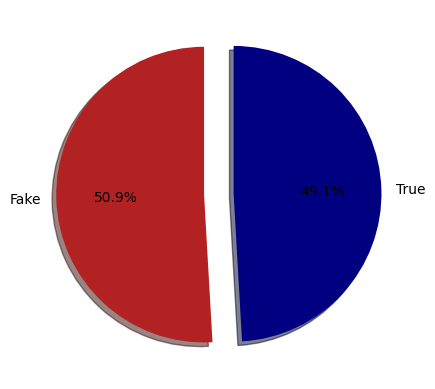

In [10]:
label_size = [news_data['label'].sum(),len(news_data['label'])-news_data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x78c6f130d900>,
 [Text(-1.1992126161948493, -0.04346379135677559, 'Fake'),
  Text(1.1992126161948493, 0.04346379135677597, 'True')],
 [Text(-0.6995406927803287, -0.025353878291452428, '51.2%'),
  Text(0.6995406927803287, 0.02535387829145265, '48.8%')])

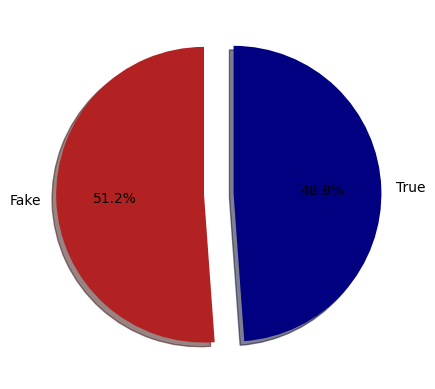

In [11]:
label_size = [test_data['label'].sum(),len(test_data['label'])-test_data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News')

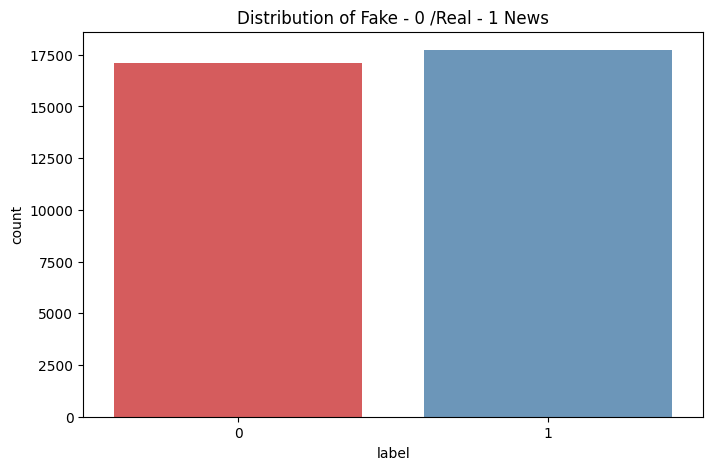

In [12]:
plt.figure(figsize = (8,5))
sns.countplot(x = news_data['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News')

Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News for test data')

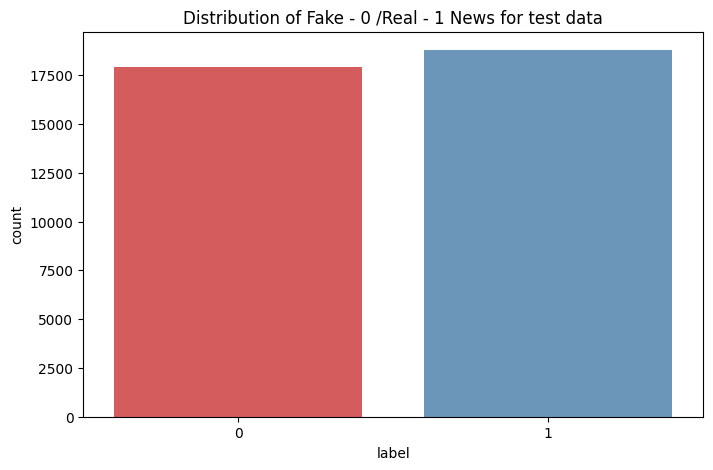

In [13]:
plt.figure(figsize = (8,5))
sns.countplot(x = test_data['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News for test data')

<ipython-input-14-c0d04376a035>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(news_data['word_count'][news_data['label'] == 1], kde=False, bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)


<Axes: xlabel='word_count', ylabel='Count'>

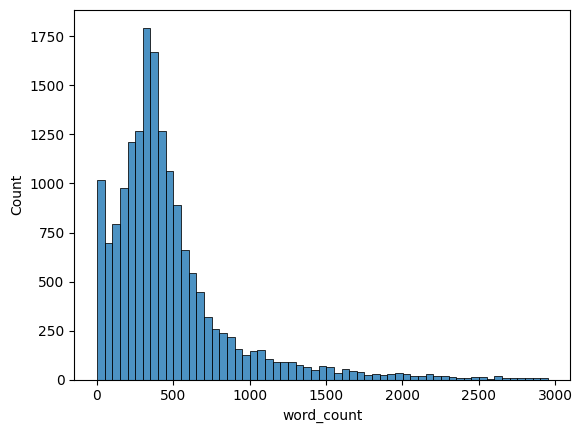

In [14]:
news_data['word_count'] = [len(s.split()) for s in news_data['text']]
#real
sns.histplot(news_data['word_count'][news_data['label'] == 1], kde=False, bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)

<ipython-input-15-9579eb9fdffe>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(news_data['word_count'][news_data['label'] == 0], kde=False, bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)


<Axes: xlabel='word_count', ylabel='Count'>

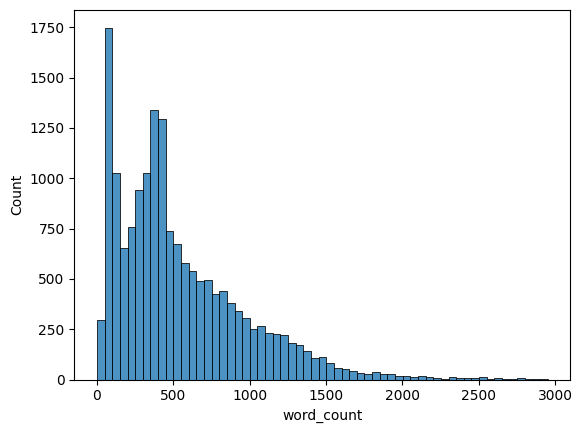

In [15]:
#fake
sns.histplot(news_data['word_count'][news_data['label'] == 0], kde=False, bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)

<ipython-input-16-df9b4255858a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(news_data['word_count'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of the News Words count')

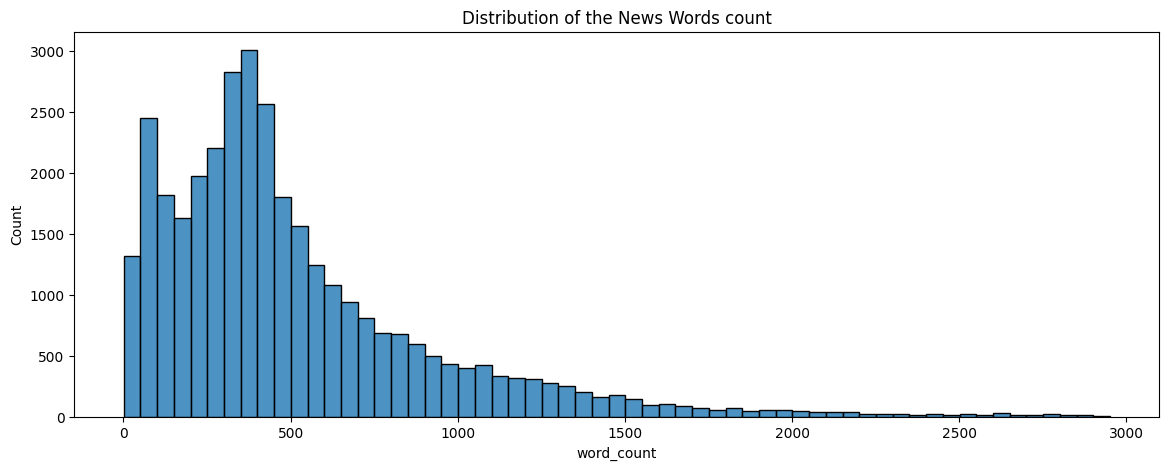

In [16]:
plt.figure(figsize = (14,5))
sns.histplot(news_data['word_count'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the News Words count')

# Data Analysis

In [25]:
stop_words = stopwords.words('english')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)

    return result

# Function to convert
def listToString(s):
    # initialize an empty string
    str1 = " "
    # return string
    return (str1.join(s))

In [27]:
# Apply cleaning function to title and text
import gensim
news_data['processed_title'] = news_data['title'].apply(preprocess)
news_data['processed_text'] = news_data['text'].apply(preprocess)

# then from list back to string
news_data['processed_title'] = news_data['processed_title'].apply(listToString)
news_data['processed_text'] = news_data['processed_text'].apply(listToString)
news_data.head()

Unnamed: 0.1  Unnamed: 0  \
0         37000       37000   
1         37001       37001   
2         37002       37002   
3         37003       37003   
4         37004       37004   

                                               title  \
0  Trump, Clinton Head Into SC with Fierce Compet...   
1  Estimated Enrollees for 2015 Health Care Decrease   
2                                Im no bloody wankah   
3  BUSTED: Trump Supporters Get Caught Creating F...   
4  Exclusive: Trump EPA transition chief laments ...   

                                                text  label  word_count  \
0  The presidential candidates are laser-focused ...      0         425   
1  About 9.9 million people will sign up to have ...      0          93   
2  I didn't know which one to do first or rather ...      1         106   
3  on October 27, 2016 2:53 am · \nConservatives ...      1         667   
4  WASHINGTON (Reuters) - The man who led Preside...      0         706   

                                     processed_title  \
0        trump clinton head fierce competition heels   
1           estimated enrollees health care decrease   
2                                      bloody wankah   
3  busted trump supporters caught creating fake b...   
4  exclusive trump epa transition chief laments s...   

                                      processed_text  
0  presidential candidates laser focused south ca...  
1  million people sign coverage affordable care a...  
2  know chronological order hello colleagues capt...  
3  october conservatives claim voter necessary ca...  
4  washington reuters man led president donald tr...

Let's take a look at our dataframes...

## News Subjects

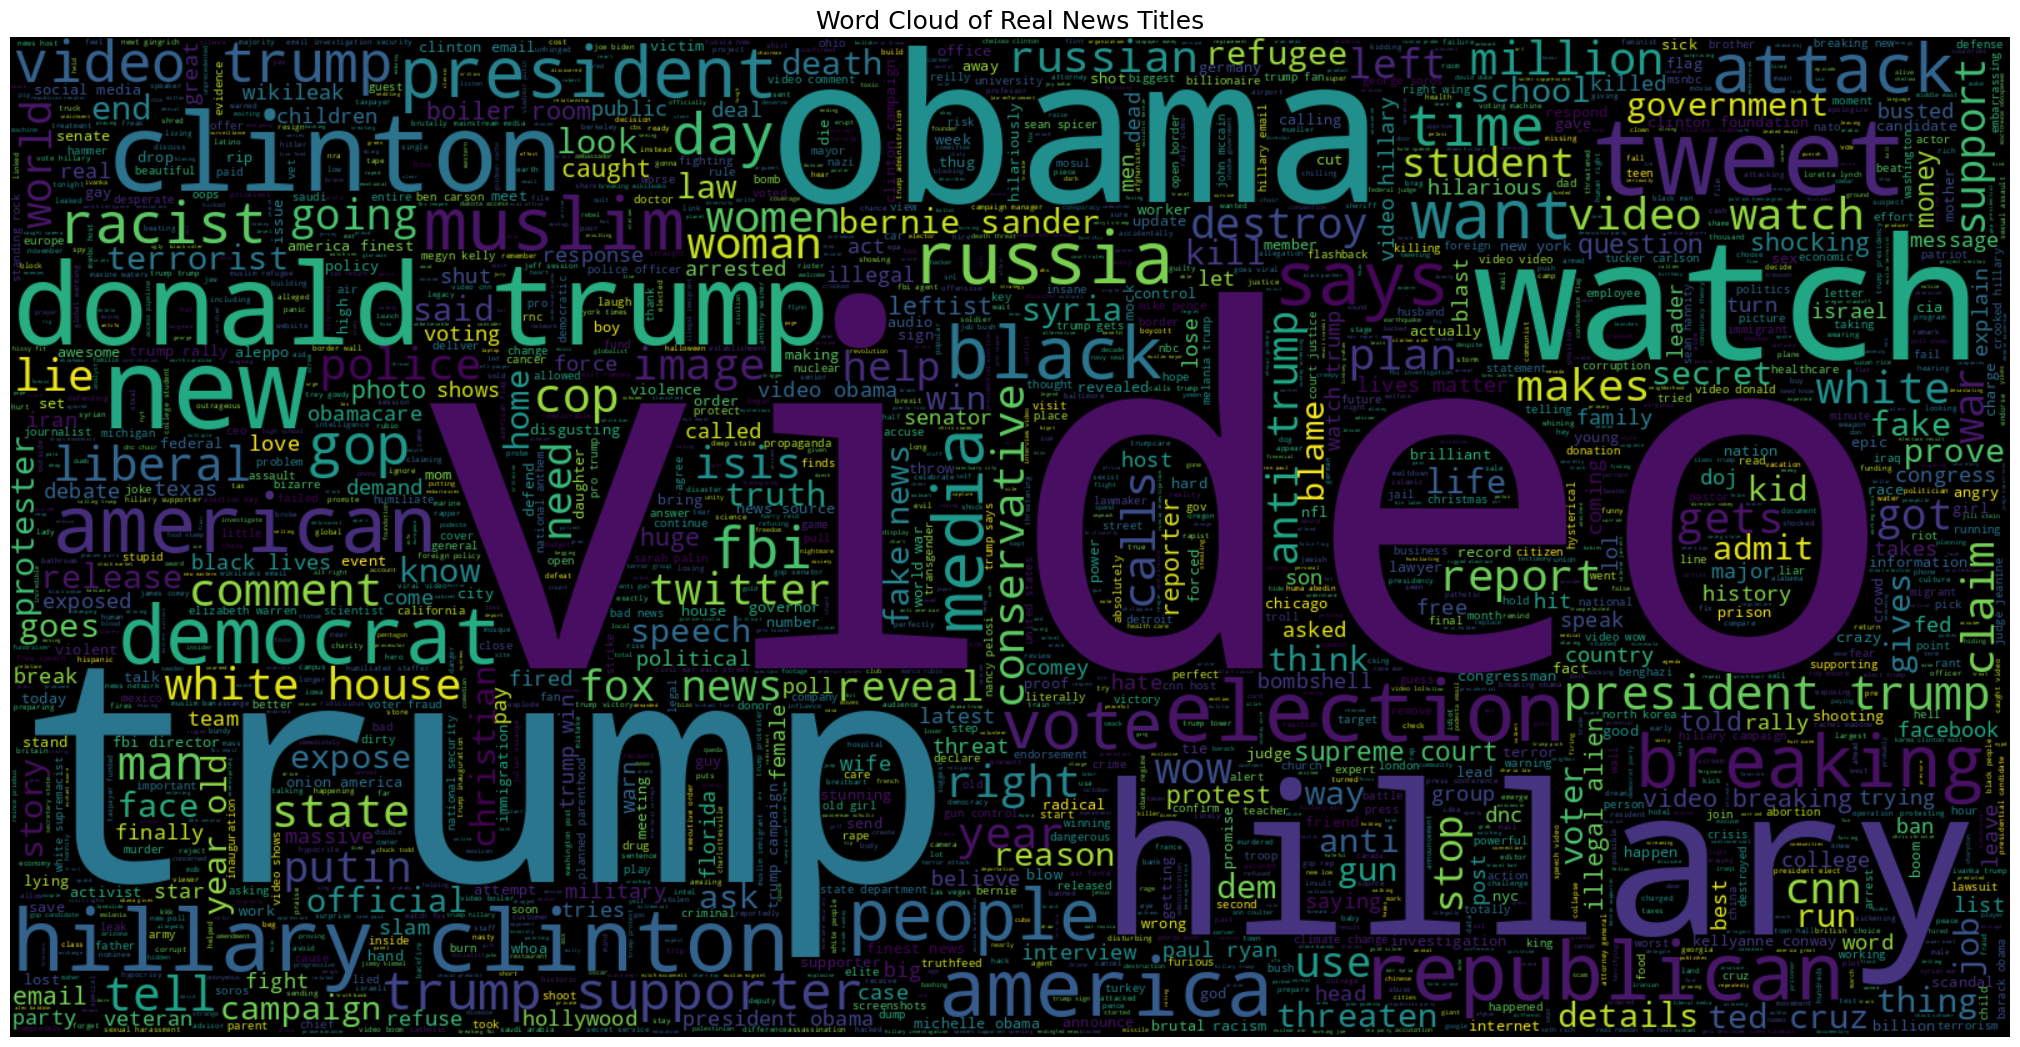

In [30]:
# word cloud.

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(news_data[news_data.label == 1].processed_title))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Real News Titles', size=18);

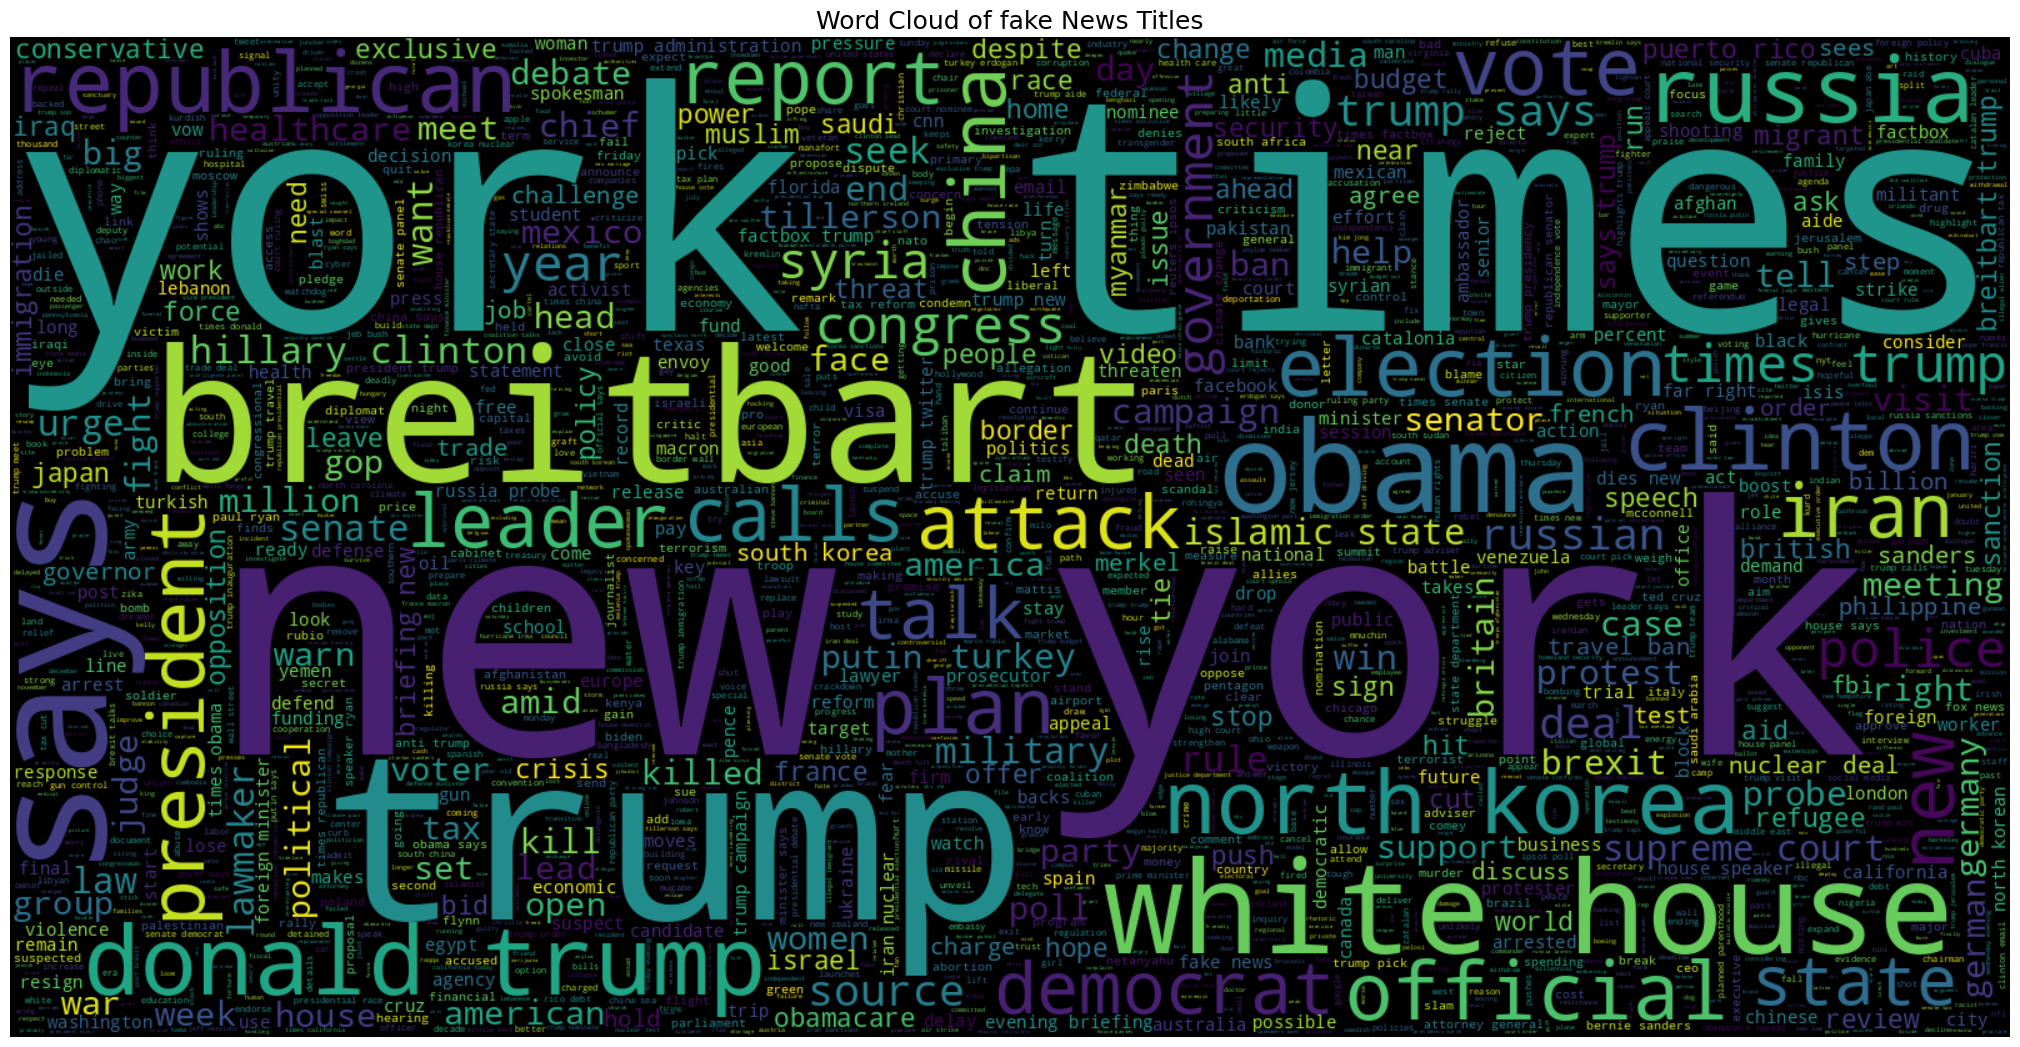

In [31]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(news_data[news_data.label == 0].processed_title))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of fake News Titles', size=18);

**Observation**: As we can see Fake and Valid News **share some frequently used words** such as "trump", "obama", "clinton", "says" etc. Therefore we can not **decide** with **absolute certainty** whether a news article is fake or not. However as we can see, there are some words which **can describe and characterize** the content of the certain news article and it's credibility.

## Average Number of Characters in Titles and Texts

Plot the **average number of characters** in valid and fake news **titles**...

In [34]:
# β. Σχεδιάστε γραφήματα που να δείχνουν το μέσο όρο των χαρακτήρων στα fake και
# στα true news αντίστοιχα. Κάντε το ίδιο και για τη στήλη text.

fig = px.histogram(x = [(len(x) - x.count(' ')) for x in news_data[news_data.label == 1].title])
fig.update_layout(title="Average Number of Characters in Valid News Titles")
fig.show()

In [35]:
fig = px.histogram(x = [(len(x) - x.count(' ')) for x in news_data[news_data.label == 0].title])
fig.update_layout(title="Average Number of Characters in Fake News Titles")
fig.show()

**Observation**: On average, the maximum number of **characters in titles** of **valid** **news** range between $44-105$ characters whereas the maximum number of **characters in titles** of **fake** **news** range between $40-80$ characters. Would be a bit tricky to judge if the news are true or fake **only by the number of characters** in their **titles**. So lets continue until we find a better distinguishing factor.

Lets do the **same** with the **news text** and check whether we can find a usefull pattern...

In [36]:
fig = px.histogram(x = [(len(x) - x.count(' ')) for x in news_data[news_data.label == 1].text])
fig.update_layout(title="Average Number of Characters in Valid News Text")
fig.show()

In [37]:
fig = px.histogram(x = [(len(x) - x.count(' ')) for x in news_data[news_data.label == 0].text])
fig.update_layout(title="Average Number of Characters in Fake News Text")
fig.show()

## Average Number of Words in Titles and Text

Plot the **average number of words** in valid and fake news **titles**...

In [ ]:
# γ. Σχεδιάστε την κατανομή του αριθμού των λέξεων για τη στήλη title και για
# τη στήλη text

fig = px.histogram(x = [len(x.split(" ")) for x in news_data[news_data.label == 1].title])
fig.update_layout(title="Average Number of Words in Valid News Titles")
fig.show()

In [ ]:
fig = px.histogram(x = [len(x.split(" ")) for x in news_data[news_data.label == 0].title])
fig.update_layout(title="Average Number of Words in Fake News Titles")
fig.show()

**Observation**: On average, the maximum number **of words in titles** of **valid** **news** range between $9-11$ words whereas the maximum number **of words in titles** of **fake** **news** range between $13-16$ words. Would be a bit tricky to judge if the news are true or fake **only by the number of words** in their **titles**.

Some titles of **fake news** may have more words making the title **provocative** or **attractive** for the person to read. This is a common practice for fake news publishers but we still can not be sure just by the article's title length.

Lets do the **same** with the **news text** and check whether we can find a usefull pattern...

In [ ]:
fig = px.histogram(x = [len(x.split(" ")) for x in news_data[news_data.label == 1].text])
fig.update_layout(title="Average Number of Words in Valid News Text")
fig.show()

In [ ]:
fig = px.histogram(x = [len(x.split(" ")) for x in news_data[news_data.label == 0].text])
fig.update_layout(title="Average Number of Words in Fake News Text")
fig.show()

**Observation**: On average again, the maximum **number of words in texts** of **valid** **news** range between $60-100$ and $400-420$ words whereas the maximum **number of words in texts** of fake news range between $0-20$ and $310-370$ words. There is a **clear difference** here regarding the length of the news articles.

**Observation**: As we can see **fake** **news** tend to keep their articles a bit **short** **in size** including **few and large words**, whereas **valid** **news** have **more** **words** in their text, which seem to be more **common** and **simple** for the user to read, informing him and providing valid information with sources and examples.

This goes to show that fake news tend to elongate their articles with **incomprehensible** **long** **words**, **obsuring and distorting** the content of the article and **misinforming** the reader. On the other hand, non-fake news keep their articles **simple** and **easy to read**, while also providing more **information**, **examples**, **reliable sources** etc.